<a href="https://colab.research.google.com/github/mertbkts/Bitcoin-Price-Prediction-Using-Twitter-Sentiment-Analysis/blob/main/Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation For Training

Importing Dependencies

In [ ]:
import pandas as pd
import numpy as np
import glob
import os
from datetime import datetime
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, LeakyReLU, BatchNormalization, Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Dataset

In [ ]:
dataset = pd.read_csv(
    "/content/drive/MyDrive/TwitterBitcoinTahminSistemi/Dataset/TwitterDataset.csv" , delimiter=';')
dataset.head()

,Count_Negatives,Count_Neutrals,Count_Positives,Open,Close
0,148,476,403,2855.81,2825.92
1,143,396,239,2823.01,2853.38
2,118,385,333,2846.27,2841.60
3,262,443,279,2841.84,2862.93
4,133,381,237,2862.92,2874.99


In [ ]:
# Extract the value "Close" from dataset. It will be the value we will try to predict 
Y=dataset.Close

In [ ]:
# Remove the value "Close" from dataset and assign it to X
X=dataset.drop(columns="Close")
X

,Count_Negatives,Count_Neutrals,Count_Positives,Open
0,148,476,403,2855.81
1,143,396,239,2823.01
2,118,385,333,2846.27
3,262,443,279,2841.84
4,133,381,237,2862.92
...,...,...,...,...
12352,300,335,425,3580.20
12353,245,346,387,3578.11
12354,186,310,421,3580.26
12355,247,305,377,3561.58


In [ ]:
Y

0        2825.92
1        2853.38
2        2841.60
3        2862.93
4        2874.99
          ...   
12352    3579.58
12353    3580.66
12354    3560.70
12355    3567.92
12356    3573.67
Name: Close, Length: 12357, dtype: float64

Train-Test Split

In [ ]:
# Splitting data into training and test sets. 80% of the data will be the training set and 20% will be the test set.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=15)

In [ ]:
X_train

,Count_Negatives,Count_Neutrals,Count_Positives,Open
501,180,556,300,4222.30
909,159,333,271,4190.61
4459,246,1255,839,8492.28
570,135,524,459,4295.11
6273,226,632,614,9694.31
...,...,...,...,...
6528,218,1037,740,8769.31
2693,412,1302,1277,9164.96
8076,255,716,670,7461.12
3829,539,1116,965,14116.64


In [ ]:
Y_train

501      4227.03
909      4276.30
4459     8777.94
570      4300.00
6273     9716.05
          ...   
6528     8757.40
2693     9350.45
8076     7390.01
3829    14187.42
7624     6323.73
Name: Close, Length: 9885, dtype: float64

In [ ]:
# Reshaping Y to 1 dimensional column array
Y_train=np.asarray(Y_train).reshape(-1,1)
Y_test=np.asarray(Y_test).reshape(-1,1)

In [ ]:
Y_train

array([[ 4227.03],
       [ 4276.3 ],
       [ 8777.94],
       ...,
       [ 7390.01],
       [14187.42],
       [ 6323.73]])

In [ ]:
# Standardization of X
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
# Store scaling parameters for future predictions
from joblib import dump, load

dump(scaler, 'scaler.bin', compress=True)

['scaler.bin']

# Building The Model And Training



In [ ]:
# Create the model and add layers to it
model=Sequential()

model.add(Dense(1024, input_dim = X_train.shape[1]))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(512))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(512))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(256))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(256))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.01))

model.add(Dense(128))
model.add(LeakyReLU())
model.add(Dropout(0.05))

model.add(Dense(1,activation="linear"))

In [ ]:
# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              5120      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 1024)              0         
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 512)               0         
                                                        

In [ ]:
# Configure the model
model.compile(optimizer=keras.optimizers.Adam(), 
              loss='mean_absolute_error')

In [ ]:
# Training
history = model.fit(X_train, Y_train,
                    epochs=300, batch_size=1024,
                    validation_data=(X_test, Y_test),
                    verbose=1)

Epoch 1/300
10/10 [==============================] - 5s 229ms/step - loss: 7260.6509 - val_loss: 7304.8438
Epoch 2/300
10/10 [==============================] - 2s 200ms/step - loss: 7253.9492 - val_loss: 7294.4829
Epoch 3/300
10/10 [==============================] - 2s 201ms/step - loss: 7246.1982 - val_loss: 7280.3926
Epoch 4/300
10/10 [==============================] - 2s 201ms/step - loss: 7234.5767 - val_loss: 7266.1001
Epoch 5/300
10/10 [==============================] - 2s 198ms/step - loss: 7218.5146 - val_loss: 7251.2769
Epoch 6/300
10/10 [==============================] - 2s 196ms/step - loss: 7198.5449 - val_loss: 7233.7773
Epoch 7/300
10/10 [==============================] - 2s 199ms/step - loss: 7174.7866 - val_loss: 7218.0605
Epoch 8/300
10/10 [==============================] - 2s 199ms/step - loss: 7147.1514 - val_loss: 7176.0977
Epoch 9/300
10/10 [==============================] - 2s 198ms/step - loss: 7114.2764 - val_loss: 7109.6689
Epoch 10/300
10/10 [=================

In [ ]:
# Save the model
model.save("model.h5")

# Statistics

In [ ]:
# Define this function to print mean absolute percentage error and mean absolute error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

def stats(model, X_test, Y_test ):
    
    y_predicted=model.predict(X_test)
    mae = mean_absolute_error(Y_test, y_predicted)
    mape=mean_absolute_percentage_error(Y_test, y_predicted)*100

    print("{:.0f}   : Mean absolute error \n".format(mae))
    print("{:.2f}% : Mean absolute percentage error\n".format(mape))

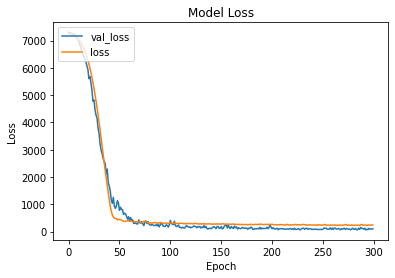

98   : Mean absolute error 

1.47% : Mean absolute percentage error



In [ ]:
# Visualizing model's training history and printing statistics
plt.plot(history.history['val_loss'],label="val_loss")
plt.plot(history.history['loss'],label="loss")
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

stats(model, X_test, Y_test )